<h1>Purpose of Project
<h2>: Predict suvival on the Titanic

<h1><u>Process</u>
<br>

<h3>0. Import data
<br>
<h3>1. Exploratory data analysis
    * Explore each data file structure
    *  Basic statistics visualization
<br>
<h3>2. Feature Engineering 
    * Data Cleansing
    * Select which feature should be included in model 
<br>
<h3>3. Modeling 
    * Logistic Regression
    * Support Vector Machine(SVM)
    * k-Nearest Neighbor(KNN)
    * Random Forest
    * Naive Bayes
<br>

<h3>4. Testing

<h1><b>0. Import Data</b>

In [3]:
import pandas as pd

test = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\python\\Kaggle\\titanic\\test.csv")
train = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\python\\Kaggle\\titanic\\train.csv")

<h1><b>1.Exploratory data analysis</b>
<h3><br>(1) Check Data info 

In [4]:
train.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [5]:
test.head(80)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
76,968,3,"Miles, Mr. Frank",male,NaN,0,0,359306,8.0500,NaN,S
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
78,970,2,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,248744,13.0000,NaN,S


<h3>(2) Check Missing Data

In [6]:
train.info()
#Age / Cabin info(=Cabin number) missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()
#Age / Cabin info(=Cabin number) missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<h3>(3)Visualization

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [9]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [10]:
# 파이차트

#def pie_cahrt(feature):
#     feature_ratio = train[feature].value_counts(sort=False)
#     feature_size = featrue_ration.size
#     feature_index = feature_ratio.index
#     survived = train[train['Survived']==1][feature].value_counts()
#     dead = train[train['Survived']==0][feature].value_counts()

# ​    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
# ​    plt.title(feature + '\'s ratio in total')
# ​    plt.show()

# ​    for i, index in enumerate(feature_index):
# ​        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
# ​        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
# ​        plt.title(str(index) + '\'s ratio')

# ​    plt.show()


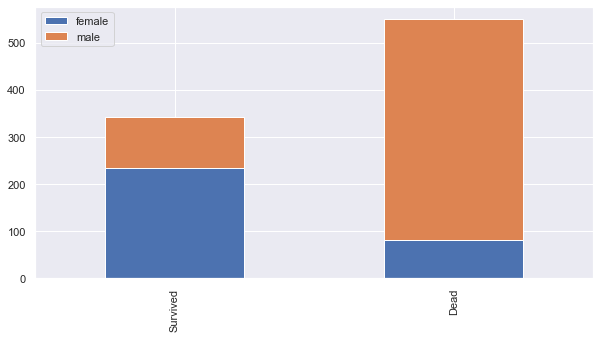

In [11]:
bar_chart('Sex')
#Chart illustrates that female tent to survived than male

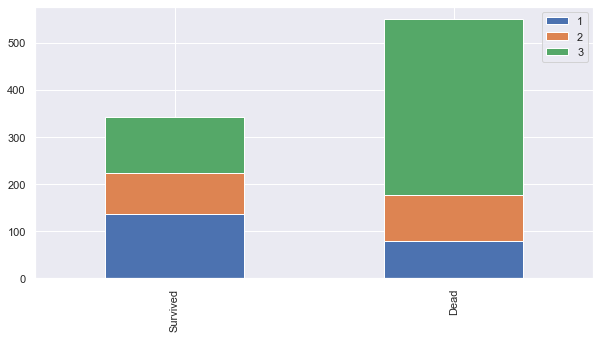

In [12]:
bar_chart('Pclass')
#Chart shows more 1st class passengers were survived than any other classes passengers
#3rd class passengers took highest proportions from the death toll

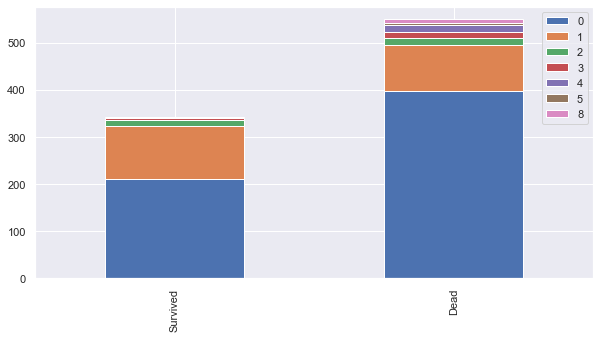

In [13]:
bar_chart('SibSp') # # of siblings / spouses aboard the Titanic

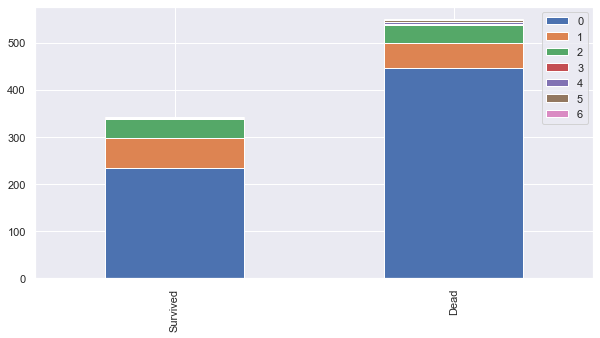

In [14]:
bar_chart('Parch') # # of parents / children aboard the Titanic

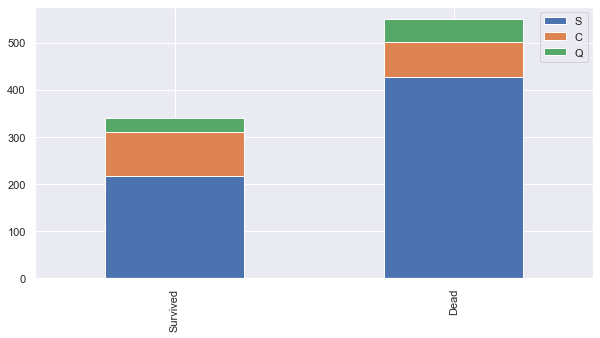

In [15]:
bar_chart('Embarked')

2. Feature Engineering
<br>To sum up Exploratory Analysis, Female & High class passengers & passengers who were accompanying family
 showed less death toll.

 <br>
 < Data preprocessing ><br>
 - Merge train & test data
 - Data cleansing
     - Name Feature : Extract 'Title' from names - Using regular expression / Unify similar title into 3 catogories -> Create dictionary: 0-Mr / 1-Miss / 2-Mrs / 3-others
     - Sex feature: convert to string Data
     - Embaked: Handle missing data - Replace 'NaN'elements<br>
        (*Ref: How to handle missing data: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)
     - Age: Binning - Categorize continuous data into few scale(=string) groups (To reduce deviation scale) / Handle missing data - Replace 'Nan' into 'Mean' value of each age group
     - Fare: Handle missing data - Replace 'Nan' into an average of each Pclass' fare / Binning - into numeric data(=int) group
     - SibSp & Parch: Merge two feature into new "Family" feature
- Drop non-using features: Name, Ticket, Cabin, SibSp, Parch

In [20]:
#Merge Train & Test Data
train_test_data = [train, test] 
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [27]:
#Data cleansing -Name Feature
for dataset in train_test_data:
    #dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.') #정규식: 대문자 A-Z로 시작하고 .로 끝나는 모든 문자열을 추출한다

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [29]:
#Count each each titles frequency
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Lady          1
Capt          1
Don           1
Sir           1
Countess      1
Jonkheer      1
Mme           1
Name: Title, dtype: int64

In [30]:
#Reshaping data using cross tabulation: Matching Title and Gender
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [32]:
#Create dictionary: 0-Mr / 1-Miss / 2-Mrs / 3-others
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Capt': 0, 'Col': 0, 'Countess': 3, 'Don': 0, 'Dr': 3, 'Jonkheer': 0, 'Lady': 3, 'Major': 0, 'Master': 0, 'Mlle': 3, 'Mme': 3, 'Ms': 2, 'Rev': 0, 'Sir': 0}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [33]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


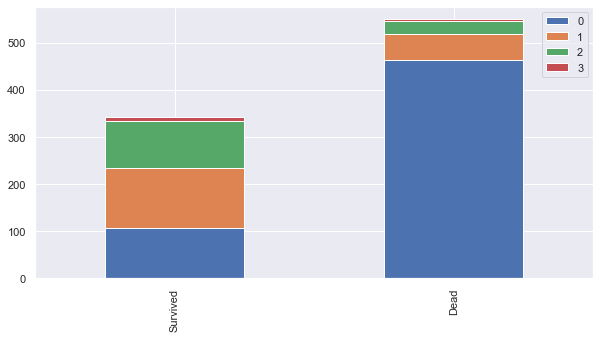

In [35]:
bar_chart('Title')